# SIR Model

## Using System Dynamics to create SIR Models

- Beschreiben, was in diesem Notebook gemacht wirdd --> Einleitung mit Theorie

In [1]:
from BPTK_Py.bptk import bptk 

bptk = bptk()

- Schwierigkeiten erläutern
- SIR Model zeichnen
- Begriffe erklären 

## Base scenario

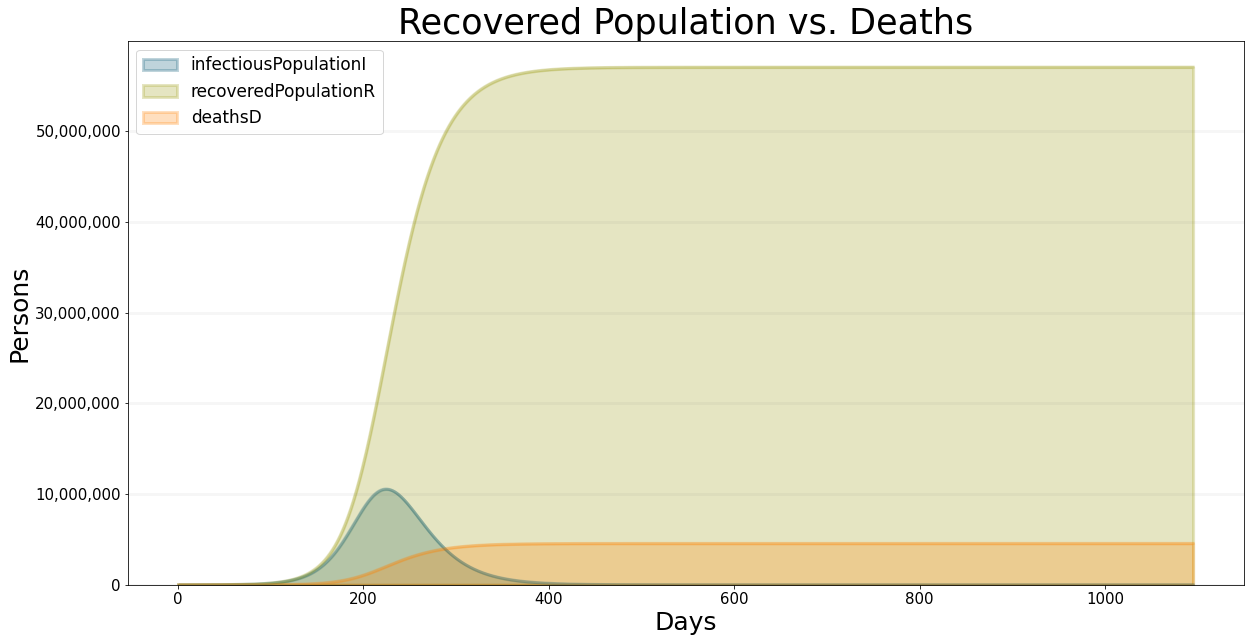

In [2]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["base"],
    title="Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "infectiousPopulationI" : "infectious Population"
    }
)

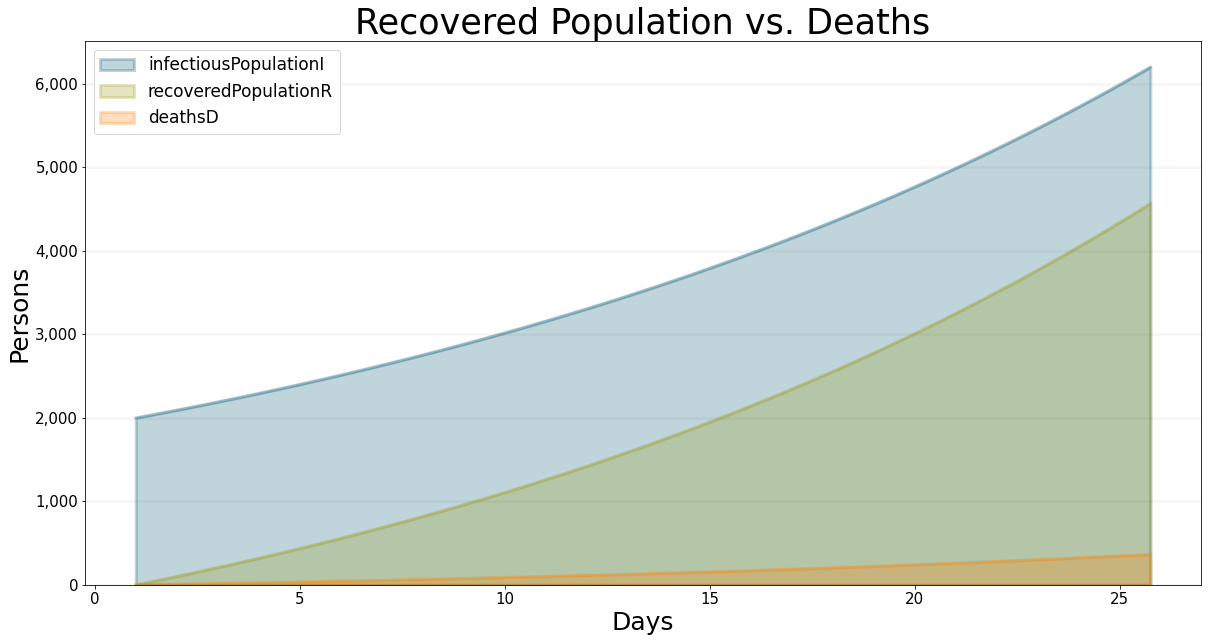

In [18]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["base"],
    title="Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "infectiousPopulationI" : "infectious Population"
    },
    visualize_from_period=0,
    visualize_to_period=100
)

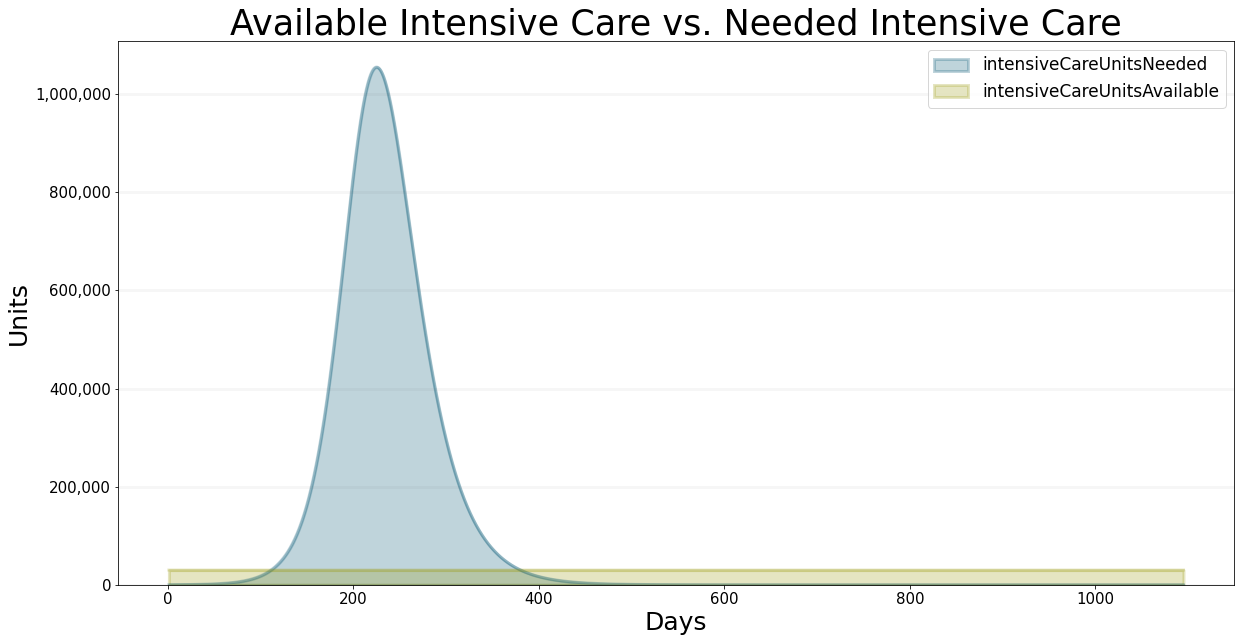

In [8]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["base"],
    title="Available Intensive Care vs. Needed Intensive Care",
    x_label="Days",
    y_label="Units",
    equations=["intensiveCareUnitsNeeded","intensiveCareUnitsAvailable"],
    series_names={
        "infectiousPopulationI" : "infectious Population"
    }
)

## Reducing Spreading of the Virus

### Less contact to other people over time

In [9]:
from BPTK_Py.sdcompiler.sdmodel import LERP

In [10]:
contact_rate = int(bptk.scenario_manager_factory.scenario_managers['smAdvancedRealistic'].scenarios['base'].model.equations['contactRateC'](0))

__Reducing the contact rate every 40 days__

In [11]:
model_large_groups = bptk.scenario_manager_factory.scenario_managers['smAdvancedRealistic'].scenarios['contactLargeGroups'].model
stoptime_large_groups = model_large_groups.stoptime

points_list_large = []
contact_large = contact_rate
for t in range(stoptime_large_groups):
    if t%40==0 and t!=0 and t < 365:
        contact_large = contact_large - 2
    if t == 600:
        contact_large = 6
    if t == 700:
        contact_large = 10
    if t == 800:
        contact_large = 14
    if t == 900:
        contact_large = 20
    points_list_large.append((t,contact_large))


model_large_groups.points["contactPointsLarge"] = points_list_large
model_large_groups.equations["contactRateC"] = lambda t: LERP(t,model_large_groups.points["contactPointsLarge"])

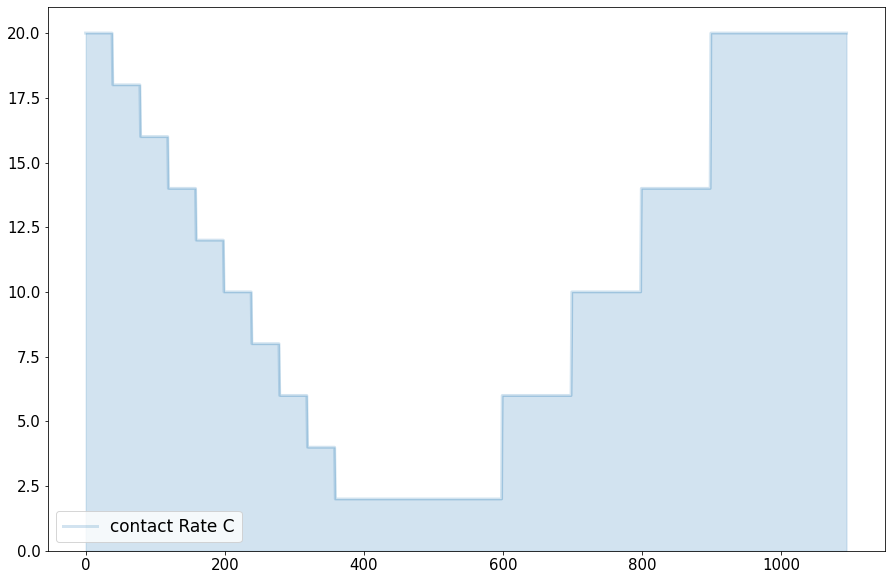

In [12]:

import pandas as pd

ax = pd.DataFrame([model_large_groups.equations["contactRateC"](t) for t in range(model_large_groups.starttime,model_large_groups.stoptime+1)]).plot(kind="area",alpha=0.2,figsize=(15,10))
ax.legend(["contact Rate C"])



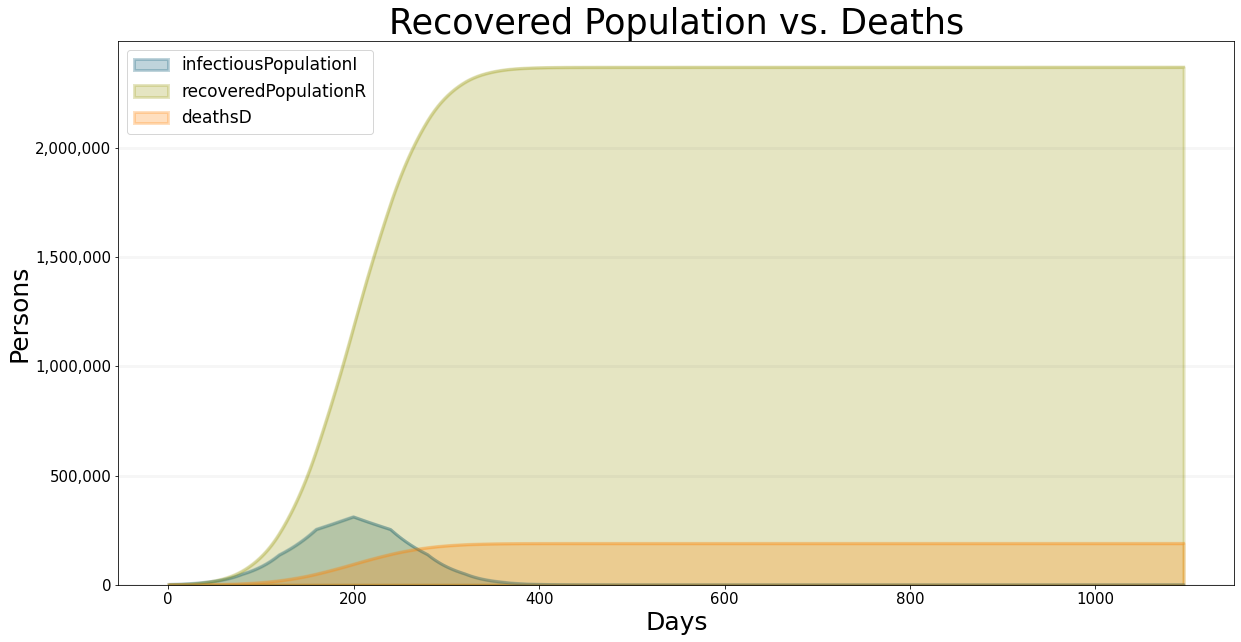

In [13]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactLargeGroups"],
    title="Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "infectiousPopulationI" : "infectious Population"
    }
)

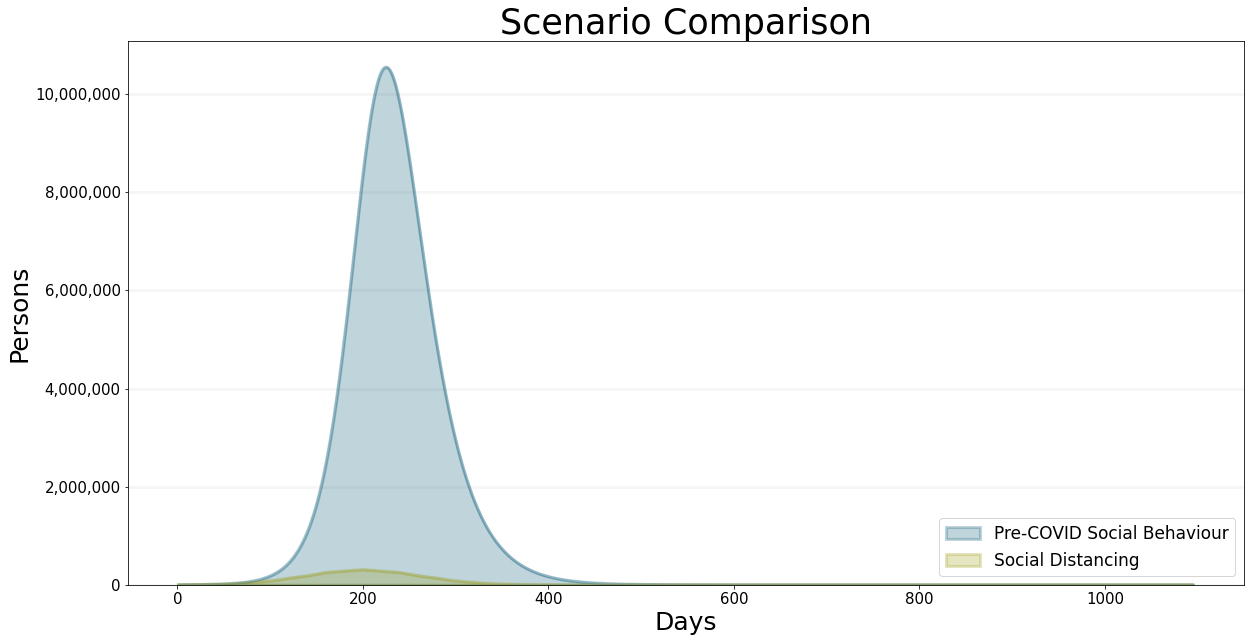

In [17]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactLargeGroups","base"],
    title="Scenario Comparison",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI"],
    series_names={
        "smAdvancedRealistic_base_infectiousPopulationI" : "Pre-COVID Social Behaviour",
        "smAdvancedRealistic_contactLargeGroups_infectiousPopulationI" : "Social Distancing"
    }
    
)

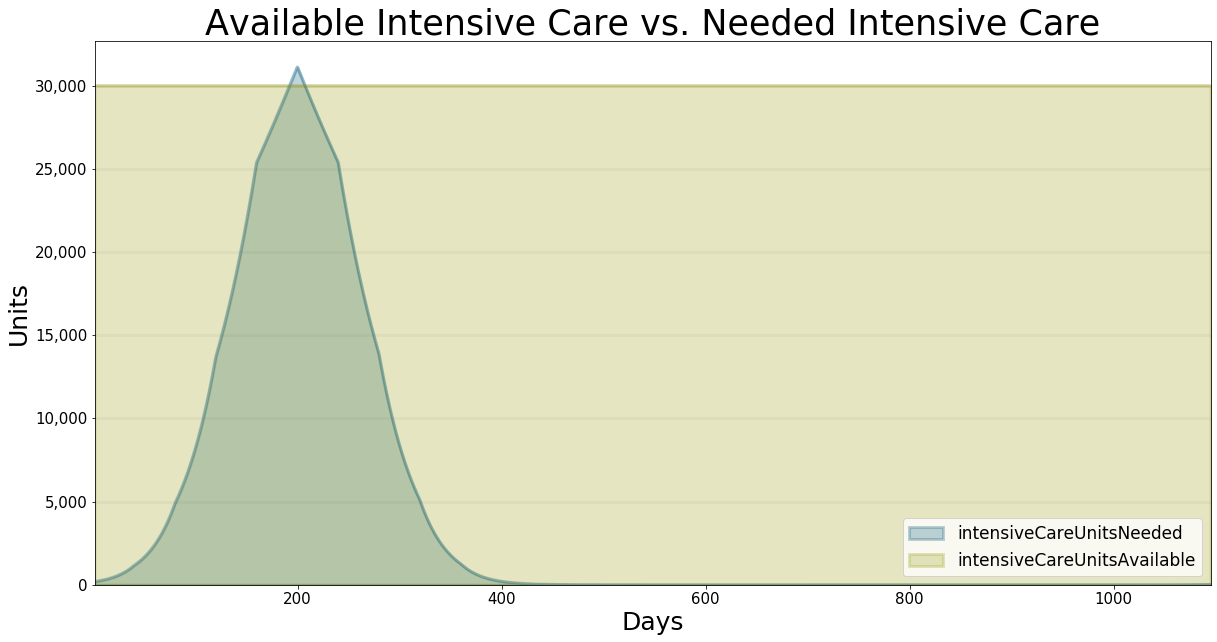

In [8]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactLargeGroups"],
    title="Available Intensive Care vs. Needed Intensive Care",
    x_label="Days",
    y_label="Units",
    equations=["intensiveCareUnitsNeeded","intensiveCareUnitsAvailable"],
    series_names={
        "infectiousPopulationI" : "infectious Population"
    }
)

__Reducing the contact rate from large groups to small groups__

In [9]:
model_small_groups = bptk.scenario_manager_factory.scenario_managers['smAdvancedRealistic'].scenarios['contactSmallGroups'].model
stoptime_small_groups = model_small_groups.stoptime

points_list_small = []
contact_small = contact_rate
for t in range(stoptime_small_groups):
    if t==5:
        contact_small= 10
    if t==8:
        contact_small = 5
    if t==300:
        contact_small = 10
    if t==150:
        contact_small = 20
    points_list_small.append((t,contact_small))


model_small_groups.points["contactPointsSmall"] = points_list_small
model_small_groups.equations["contactRateC"] = lambda t: LERP(t,model_small_groups.points["contactPointsSmall"])

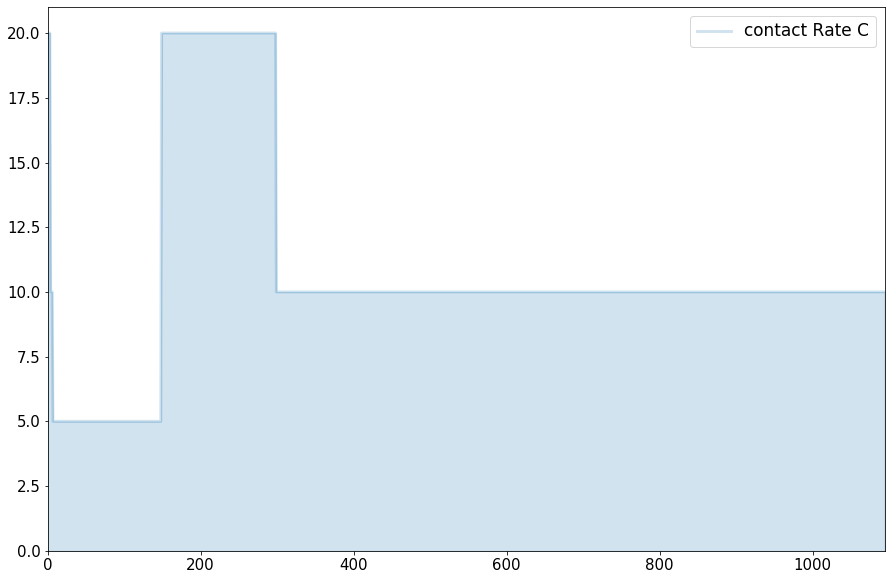

In [55]:
import pandas as pd

ax = pd.DataFrame([model_small_groups.equations["contactRateC"](t) for t in range(model_small_groups.starttime,model_small_groups.stoptime+1)]).plot(kind="area",alpha=0.2,figsize=(15,10))
ax.legend(["contact Rate C"])

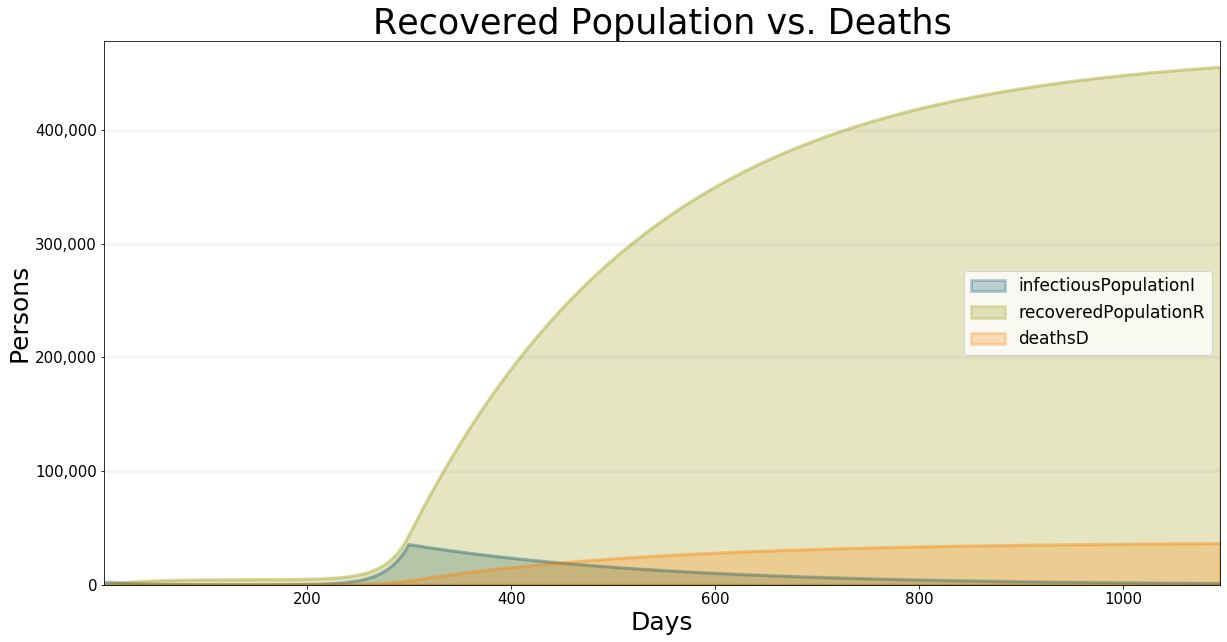

In [10]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactSmallGroups"],
    title="Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "infectiousPopulationI" : "infectious Population"
    }
)

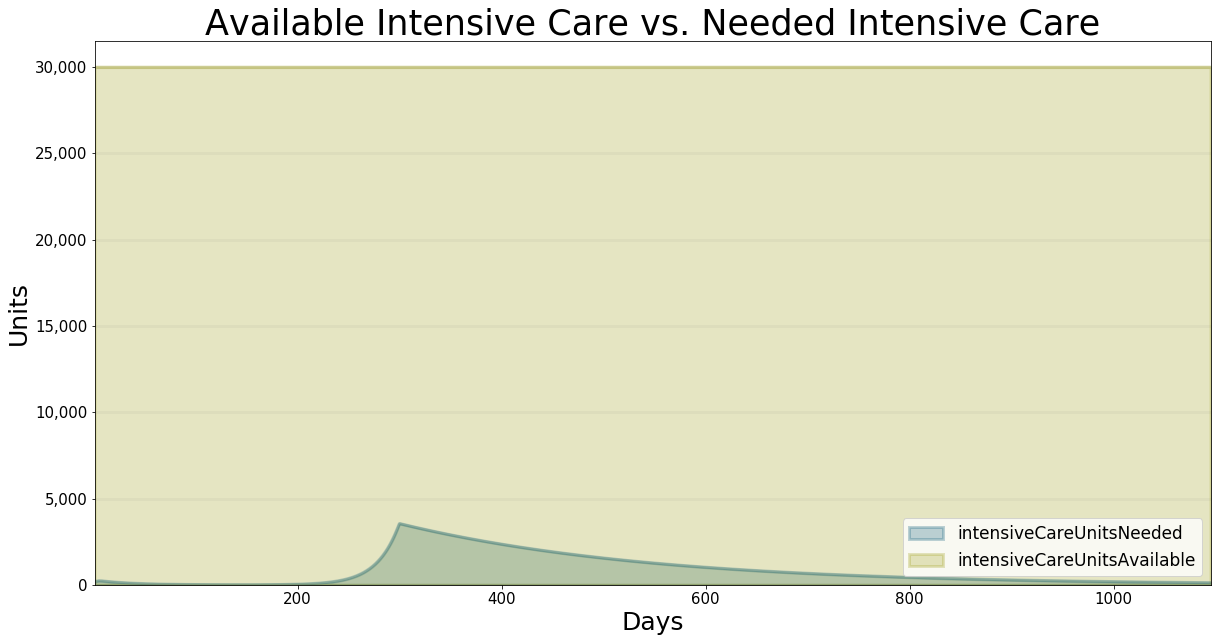

In [11]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactSmallGroups"],
    title="Available Intensive Care vs. Needed Intensive Care",
    x_label="Days",
    y_label="Units",
    equations=["intensiveCareUnitsNeeded","intensiveCareUnitsAvailable"],
    series_names={
        "infectiousPopulationI" : "infectious Population"
    }
)

__Reducing contact from large groups to two people__

In [12]:
model_two_people = bptk.scenario_manager_factory.scenario_managers['smAdvancedRealistic'].scenarios['contactTwoPeople'].model
stoptime_two_people = model_two_people.stoptime

points_list_two = []
contact_two = contact_rate
for t in range(stoptime_two_people):
    if t==10:
        contact_two = 2
    if t==300:
        contact_two = 5
    points_list_two.append((t,contact_two))


model_two_people.points["contactPointsTwo"] = points_list_two
model_two_people.equations["contactRateC"] = lambda t: LERP(t,model_two_people.points["contactPointsTwo"])

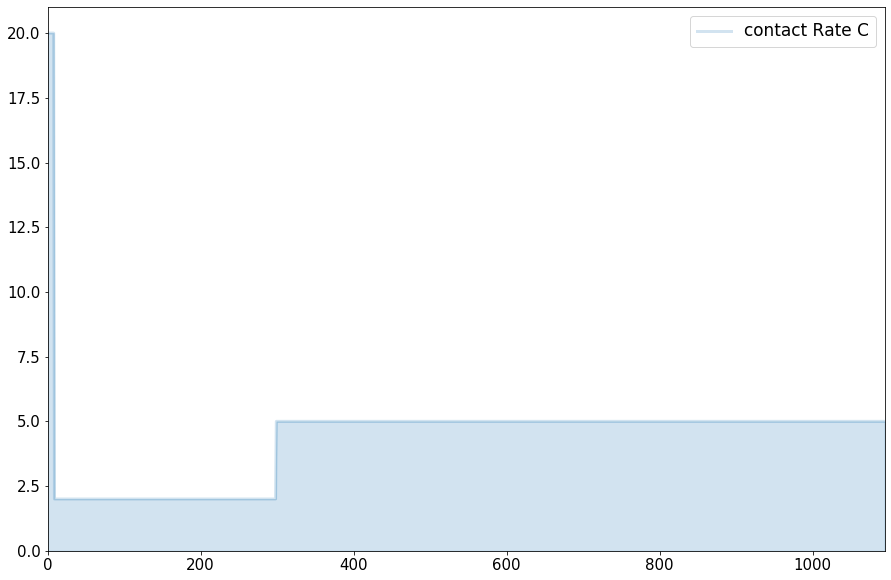

In [56]:
import pandas as pd

ax = pd.DataFrame([model_two_people.equations["contactRateC"](t) for t in range(model_two_people.starttime,model_two_people.stoptime+1)]).plot(kind="area",alpha=0.2,figsize=(15,10))
ax.legend(["contact Rate C"])

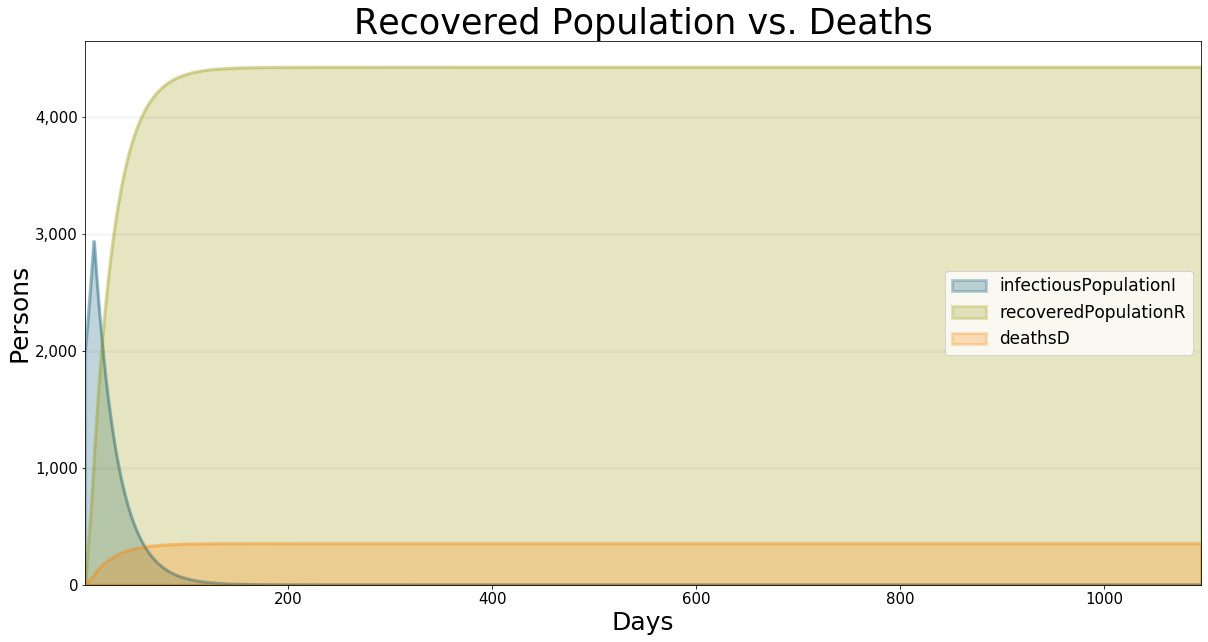

In [13]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactTwoPeople"],
    title="Recovered Population vs. Deaths",
    x_label="Days",
    y_label="Persons",
    equations=["infectiousPopulationI","recoveredPopulationR","deathsD"],
    series_names={
        "infectiousPopulationI" : "infectious Population"
    }
)

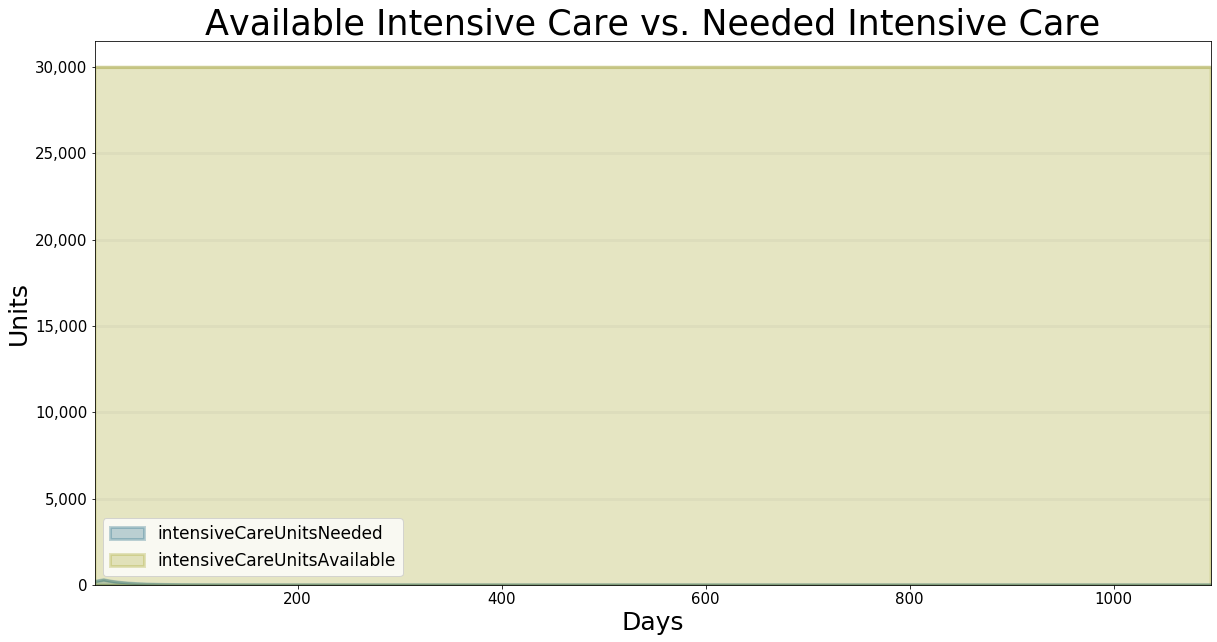

In [14]:
bptk.plot_scenarios(
    scenario_managers=["smAdvancedRealistic"],
    scenarios=["contactTwoPeople"],
    title="Available Intensive Care vs. Needed Intensive Care",
    x_label="Days",
    y_label="Units",
    equations=["intensiveCareUnitsNeeded","intensiveCareUnitsAvailable"],
    series_names={
        "infectiousPopulationI" : "infectious Population"
    }
)

In [15]:
%run src/dashboard/sir_dashboard.ipy